In [35]:
%run functions.ipynb

Ready: 2023-05-29 00:39:41


In [108]:
size_x = 30.7 / 2.54 * 4
size_y = 16   / 2.54 * 4
font_size = 38

df = pd.read_excel('files/ten_city/ratings_df.xlsx').fillna(0).astype(
    {'Рубрика':str, 
'Пользователи 2020':int,
'Пользователи 2021':int,
'Пользователи 2022':int,
'Пользователи 2023':int,
'Пользователи, итого':int,
'Пользователи, %' : float,
'Запросы 2020':int,
'Запросы 2021':int,
'Запросы 2022':int,
'Запросы 2023':int,
'Запросы, итого':int,
'Запросы, %' : float,                                                                      
})

df['Запросы, %'] = df['Запросы, %'].round(1)
df['Пользователи, %'] = df['Пользователи, %'].round(1)

df_users = df[[
    'Рубрика',
    'Пользователи 2020',
    'Пользователи 2021',
    'Пользователи 2022',
    'Пользователи 2023',
    'Пользователи, итого',
    'Пользователи, %'
]].iloc[list(range(15))+[-1]].sort_values('Пользователи, итого', ascending=False)

df_requests = df[[
    'Рубрика',
    'Запросы 2020',
    'Запросы 2021',
    'Запросы 2022',
    'Запросы 2023',
    'Запросы, итого',
    'Запросы, %'
]].iloc[list(range(15))+[-1]].sort_values('Запросы, итого', ascending=False)

#249FD8
#7FA2D3
#D2DDF1

def make_hse_image(df, output_file_name=None, cols_without_color=[0], dedup_cols=None, col_width=1.0, row_height=0.625, font_size=28,
                     header_color='#249FD8', row_colors=['#D2DDF1', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     show=False, **kwargs):
    rating_col = df.columns[-1]
    data = df.sort_values(rating_col, ascending=False)
    data_separeted_numbers = data.copy()
    for col in data.columns[1:]:
        data_separeted_numbers[col] = data[col].apply(make_sep)
        if col in ['Пользователи, %', 'Запросы, %', 'Запросов на пользователя,\nитого']:
            data_separeted_numbers[col] = data[col].apply(lambda x: str(x).replace('.',','))
        
    size = (np.array([size_x, size_y]))
    fig, ax = plt.subplots(figsize=size, dpi=2**8)
    ax.axis('off')

    mpl_table = ax.table(cellText=data_separeted_numbers.values, bbox=bbox, colLabels=data.columns, colLoc='center', loc='bottom')
    mpl_table.auto_set_font_size(False)
    cells_dict = dict(six.iteritems(mpl_table._cells))
        
    fpath = Path(mpl.get_data_path(), r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\arialnarrow.ttf")
    colors_dict = colorize_column(df, cols_not_to_color=cols_without_color)
    colors_dict.update(colorize_column(data, cols_not_to_color=list(range(data.shape[1]-1))), filter_zero=True)
    colors = ([color_list_full[i] for i in range(0, len(color_list_full), len(color_list_full) % 15)] + [color_list_full[-1]]) 
    
    for k in sorted(cells_dict.keys()): #k[0] - строка, k[1] - столбец
        cell = cells_dict[k]
        cell.set_edgecolor(edge_color)
        row_index = k[0]
        column_index = k[1]
        
        # Высота и цвет заголовков
        if row_index == 0:
            rotation='horizontal' if k == (0,0) else 'vertical' 
            cell.set_text_props(color='w', rotation=rotation, ha='center')
            cell.set_facecolor(header_color)
        # Высота и цвет остальных строк
        else:
            ha = 'left' if column_index ==0 else 'right'
            cell.set_facecolor(row_colors[k[0]%len(row_colors)])
            cell.set_text_props(wrap=True, ha=ha)
            
        if row_index == 0:
            cell.set_height(24)
        elif row_index > 0 and row_index < 13:
            cell.set_height(5)
        else:
            cell.set_height(4)
        
        # Ширина столбцов
        if column_index == 0:
            cell.set_width(35)
        elif column_index == 6:
            cell.set_width(10)
        else:
            cell.set_width(11)
                        
        # Цветвоая шкала
        if row_index > 0 and column_index not in cols_without_color and row_index<16:
            cell.set_facecolor(colors.pop(0).upper())       
            
        if row_index == 16:
            cell.set_text_props(color='w')
            cell.set_facecolor(header_color) 
            if column_index == 6:
                cell.set_text_props(color=header_color)
            
        # Шрифт
        cell.set_text_props(font=fpath, fontsize=font_size)
    if output_file_name:
        fig.savefig(f'{output_file_name}', bbox_inches='tight')
    if show:
        plt.show()
    plt.close() 

def make_hse_image2(df, output_file_name=None, cols_without_color=[0], dedup_cols=None, col_width=1.0, row_height=0.625, font_size=28,
                     header_color='#249FD8', row_colors=['#D2DDF1', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     show=False, **kwargs):
    rating_col = df.columns[-1]
    data = df
    data['Население'] = data['Население'].apply(make_sep)
    size = (np.array([size_x, size_y]))
    fig, ax = plt.subplots(figsize=size, dpi=2**8)
    ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, colLoc='center', loc='bottom')
    mpl_table.auto_set_font_size(False)
    cells_dict = dict(six.iteritems(mpl_table._cells))
    
    fpath = Path(mpl.get_data_path(), r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\arialnarrow.ttf")
    colors = ([color_list_full[i] for i in range(0, len(color_list_full), len(color_list_full) % 20)] + [color_list_full[-1]]) 
    
    for k in sorted(cells_dict.keys()): #k[0] - строка, k[1] - столбец
        cell = cells_dict[k]
        cell.set_edgecolor(edge_color)
        row_index = k[0]
        column_index = k[1]
        
        # Высота и цвет заголовков
        if row_index == 0:
            rotation='horizontal' if k == (0,0) else 'vertical' 
            cell.set_text_props(color='w', ha='center')
            cell.set_facecolor(header_color)
            
        # Высота и цвет остальных строк
        else:
            ha = 'left' if column_index in (0,1,2) else 'right'
            cell.set_facecolor(row_colors[k[0]%len(row_colors)])
            cell.set_text_props(wrap=True, ha=ha)
        
        if row_index == 0:
            cell.set_height(24)
        elif row_index > 0 and row_index < 5:
            cell.set_height(5)
        else:
            cell.set_height(4) 
        
        
        # Ширина столбцов
        if column_index == 0:
            cell.set_width(5)
            cell.set_text_props(ha='right')
        elif column_index == 1:
            cell.set_width(30)
        elif column_index == 2:
            cell.set_width(33)
        else:
            cell.set_width(32)
            
        if row_index == 0 and column_index == 0:
            cell.set_text_props(ha='center')

        # Цветвоая шкала
        if row_index > 0 and column_index == 3:
            cell.set_facecolor(colors.pop(0).upper())       
            
        if row_index == 18:
            cell.set_text_props(color='w')
            cell.set_facecolor(header_color) 
            if column_index == 1 or column_index == 2:
                cell.set_text_props(color=header_color)
            
        # Шрифт
        cell.set_text_props(font=fpath, fontsize=font_size)
    if output_file_name:
        fig.savefig(f'{output_file_name}', bbox_inches='tight')
    if show:
        plt.show()
    plt.close()    


def plt_requsts(data, file_name, index_col_to_colorize=5, dups=None, col_width=1.0, row_height=0.625, font_size=font_size, size_x=size_x, size_y=size_y,
                     header_color='#C0504D', row_colors=['#F2DCDB', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    size = (np.array([size_x, size_y]))
    fig, ax = plt.subplots(figsize=size, dpi=2**8)
    ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, colLoc='center', loc='bottom')

    mpl_table.auto_set_font_size(False)
    cells_dict = dict(six.iteritems(mpl_table._cells))

    fpath = Path(mpl.get_data_path(), r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\arialnarrow.ttf")
    color_list_full = ['#F96A6C', '#F96B6C', '#F96C6C', '#F96D6C', '#F96E6C', '#F96F6D', '#F9706D', '#F9716D', '#F9726D', '#F9736D', '#F9746E', '#F9756E', '#F9766E', '#F9776E', '#F9786E', '#F9796E', '#F9796F', '#F97A6F'
                       , '#F97B6F', '#F97C6F', '#FA7C6F', '#FA7D6F', '#FA7E6F', '#FA7E70', '#FA7F70', '#FA8070', '#FA8170', '#FA8270', '#FA8370', '#FA8471', '#FA8571', '#FA8671', '#FA8771', '#FA8871', '#FA8972', '#FA8A72'
                       , '#FA8B72', '#FA8C72', '#FA8D72', '#FA8E73', '#FB8F73', '#FB9073', '#FB9173', '#FB9273', '#FB9373', '#FB9374', '#FB9474', '#FB9574', '#FB9674', '#FB9774', '#FB9874', '#FB9875', '#FB9975', '#FB9A75'
                       , '#FB9B75', '#FB9C75', '#FB9D75', '#FB9E76', '#FB9F76', '#FBA076', '#FBA176', '#FCA176', '#FCA276', '#FCA377', '#FCA477', '#FCA577', '#FCA677', '#FCA777', '#FCA877', '#FCA878', '#FCA978', '#FCAA78'
                       , '#FCAB78', '#FCAC78', '#FCAD78', '#FCAD79', '#FCAE79', '#FCAF79', '#FCB079', '#FCB179', '#FCB279', '#FCB27A', '#FCB37A', '#FDB47A', '#FDB57A', '#FDB67A', '#FDB77A', '#FDB87B', '#FDB97B', '#FDBA7B'
                       , '#FDBB7B', '#FDBC7B', '#FDBD7C', '#FDBE7C', '#FDBF7C', '#FDC07C', '#FDC17C', '#FDC27C', '#FDC27D', '#FDC37D', '#FDC47D', '#FDC57D', '#FDC67D', '#FEC77D', '#FEC77E', '#FEC87E', '#FEC97E', '#FECA7E'
                       , '#FECB7E', '#FECC7E', '#FECC7F', '#FECD7F', '#FECE7F', '#FECF7F', '#FED07F', '#FED17F', '#FED280', '#FED380', '#FED480', '#FED580', '#FED680', '#FED781', '#FED881', '#FFD981', '#FFDA81', '#FFDB81'
                       , '#FFDC81', '#FFDC82', '#FFDD82', '#FFDE82', '#FFDF82', '#FFE082', '#FFE182', '#FFE183', '#FFE283', '#FFE383', '#FFE483', '#FFE583', '#FFE683', '#FFE784', '#FFE884', '#FFE984', '#FFEA84', '#FFEB84'
                       , '#FEEA83', '#FDEA83', '#FCEA83', '#FBEA83', '#FAE983', '#F9E983', '#F8E983', '#F7E883', '#F6E883', '#F5E883', '#F4E883', '#F4E783', '#F3E783', '#F2E783', '#F1E783', '#F0E683', '#EFE683', '#EEE683'
                       ,'#EDE683', '#EDE582', '#ECE582', '#EBE582', '#EAE582', '#EAE482', '#E9E482', '#E8E482', '#E7E482', '#E6E482', '#E6E382', '#E5E382', '#E4E382', '#E3E382', '#E3E282', '#E2E282', '#E1E282', '#E0E282'
                       , '#DFE182', '#DEE182', '#DDE182', '#DCE182', '#DCE081', '#DBE081', '#DAE081', '#D9E081', '#D8DF81', '#D7DF81', '#D6DF81', '#D5DF81', '#D4DE81', '#D3DE81', '#D2DE81', '#D1DD81', '#D0DD81', '#CFDD81'
                       , '#CEDD81', '#CDDC81', '#CCDC81', '#CBDC81', '#CADB80', '#C9DB80', '#C8DB80', '#C7DB80', '#C7DA80', '#C6DA80', '#C5DA80', '#C4DA80', '#C3D980', '#C2D980', '#C1D980', '#C0D980', '#C0D880', '#BFD880'
                       , '#BED880', '#BDD880', '#BDD780', '#BCD780', '#BBD780', '#BAD780', '#B9D780', '#B9D67F', '#B8D67F', '#B7D67F', '#B6D67F', '#B6D57F', '#B5D57F', '#B4D57F', '#B3D57F', '#B2D47F', '#B1D47F', '#B0D47F'
                       , '#AFD47F', '#AED37F', '#ADD37F', '#ACD37F', '#ABD27F', '#AAD27F', '#A9D27F', '#A8D27F', '#A7D17E', '#A6D17E', '#A5D17E', '#A4D07E', '#A3D07E', '#A2D07E', '#A1D07E', '#A0CF7E', '#9FCF7E', '#9ECF7E'
                       , '#9DCE7E', '#9CCE7E', '#9BCE7E', '#9ACE7E', '#9ACD7E', '#99CD7E', '#98CD7E', '#97CD7E', '#96CC7D', '#95CC7D', '#94CC7D', '#93CC7D', '#93CB7D', '#92CB7D', '#91CB7D', '#90CB7D', '#90CA7D', '#8FCA7D'
                       , '#8ECA7D', '#8DCA7D', '#8CCA7D', '#8CC97D', '#8BC97D', '#8AC97D', '#89C97D', '#88C87D', '#87C87D', '#86C87D', '#85C77C', '#84C77C', '#83C77C', '#82C77C', '#81C67C', '#80C67C', '#7FC67C', '#7EC57C'
                       , '#7DC57C', '#7CC57C', '#7BC57C', '#7AC47C', '#79C47C', '#78C47C', '#77C37C', '#76C37C', '#75C37C', '#74C37C', '#73C27B'
                       , '#72C27B', '#71C27B', '#70C17B', '#6FC17B', '#6EC17B', '#6DC17B', '#6DC07B', '#6CC07B', '#6BC07B', '#6AC07B', '#69BF7B', '#68BF7B', '#67BF7B', '#66BF7B', '#66BE7B', '#65BE7B', '#64BE7B', '#63BE7B']
    colors = ([color_list_full[i] for i in range(0, len(color_list_full), len(color_list_full) % 20)] + [color_list_full[-1]])
    
    for k in sorted(cells_dict.keys()): #k[0] - строка, k[1] - столбец
        cell = cells_dict[k]
        cell.set_edgecolor(edge_color)
        row_index = k[0]
        column_index = k[1]
        
        # Высота и цвет заголовков
        if row_index == 0:
            rotation='horizontal' if k == (0,0) else 'vertical' 
            cell.set_text_props(color='w', rotation=rotation, ha='center')
            cell.set_facecolor(header_color)
            
        # Высота и цвет остальных строк
        else:
            ha = 'right' if k[1] !=0 else 'left'
            cell.set_facecolor(row_colors[k[0]%len(row_colors)])
            cell.set_text_props(wrap=True, ha=ha)
        
        if row_index == 0:
            cell.set_height(24)
        elif row_index > 0 and row_index < 17:
            cell.set_height(4)
        else:
            cell.set_height(3)
        
        # Ширина столбцов
        if column_index == 0:
            cell.set_width(35)
        elif column_index == 5:
            cell.set_width(13)
        else:
            cell.set_width(13)
        
        # Раскраска дублей
        if dups is not None:
            if row_index > 0 and column_index == 0 and cell.get_text().get_text() in dups:
                cell.set_facecolor('#FFC7CE')
                cell.set_text_props(color='#9C0006')
                
        # Цветвоая шкала
        if row_index > 0 and column_index == index_col_to_colorize:
            cell.set_facecolor(colors.pop(0).upper()) 
        
        # Шрифт
        cell.set_text_props(font=fpath, fontsize=font_size)
    fig.savefig(f'{file_name}', bbox_inches='tight')
    plt.show()
    plt.close()

def make_plt_requsts(file_name, city, header_color, row_color, cnt=9999, size_x=size_x, size_y=size_y, font_size=font_size, img_w=17.5, img_h=10.8, blank=False, word_sample='files/report.docx'):
    dt_now = str(datetime.datetime.now())[2:-9].replace('-','').replace(':','').replace(' ','_')
    df = pd.read_excel(file_name).drop(['tx_1','tx_2','tx_3','tx_4','tx_5'], axis=1)
    word_file = f'{file_name[:-5]}_report_{dt_now}.docx'
    #print(word_file)
    
    df.columns = ['Рубрика', 'Поисковый запрос', 'Количество\nзапросов 2020',
           'Количество\nзапросов 2021', 'Количество\nзапросов 2022',
           'Количество\nзапросов 2023', 'Количество\nзапросов, итого',
           'Рейтинг\nпо запросам, итого', 'Рейтинг рубрики']

    for i in df.columns[2:-2]:
        df[i] = df[i].apply(make_sep)
        
    dups = df['Поисковый запрос'][(df['Поисковый запрос'].duplicated())&(df['Рейтинг рубрики'] > 0)].values 
    df_text = pd.read_excel(file_name, usecols=['Рубрика', 'Рейтинг рубрики', 'Поисковый запрос', 'tx_1'])
    df_text = df_text[df_text['tx_1'].notna()]
    tx_1 = df_text[df_text['Поисковый запрос'].apply(lambda x: x not in dups)][['tx_1', 'Рейтинг рубрики']]
    imgs = []
    for i in (df['Рейтинг рубрики'].unique()[1:cnt+1]):  
        dfx = df[df['Рейтинг рубрики'] == i].drop('Рубрика', axis=1).iloc[:20]
        rubric = df[df['Рейтинг рубрики'] == i]['Рубрика'].iloc[0]
        col_name = f'Поисковые запросы по рубрике\n{rubric}'
        img_file_name = file_name.replace('files/','')[:-5]
        img_file_name_final = f'pictures/{img_file_name}_{i:02}.png'
        dfx = dfx.rename({'Поисковый запрос':col_name}, axis=1).drop(['Рейтинг рубрики', 'Рейтинг\nпо запросам, итого'], axis=1)
        plt_requsts(dfx, img_file_name_final, size_x=size_x, size_y=size_y, font_size=font_size, header_color=header_color, row_colors=[row_color, 'w'], dups=dups)
        imgs.append(img_file_name_final)
    return imgs



def make_ratings_word(file_name, header_color, row_color, cnt=9999, size_x=size_x, size_y=size_y, font_size=18, img_w=17.5, img_h=10.8, blank=False, word_sample='files/report.docx'):
    dt_now = str(datetime.datetime.now())[2:-9].replace('-','').replace(':','').replace(' ','_')
    df = pd.read_excel(file_name)
    word_file = f'{file_name[:-17]}_report_{dt_now}.docx'
    #print(word_file)
    
    df = df[(df['№']!='Итог')]
    cols = [
        'Рубрика' 
        ,'Пользователи, итого'
        ,'Пользователи, %'
        ,'Запросы, итого'
        ,'Запросы, %'
        ,'Запросов на пользователя,\nитого'
    ]

    ratings_cols = [i for i in df.columns if 'ейтинг' in i and i not in  ('В рейтингах, раз','Рейтинг суммарный','Рейтинг средний','Вне рейтингов')]

    for col in ratings_cols:
        df[col] = df[col].astype('int').round()

    for col in ['Пользователи, %', 'Запросы, %', 'Запросов на пользователя,\nитого']:
        df[col] = df[col].astype('float64').round(1)
    
    i=0
    imgs = []
    for col in ([ratings_cols[3], ratings_cols[28]]):  
        i+=1
        cols_filter = cols+[col]    
        dfx = df[df[col]>0].sort_values(col)['Рубрика'].values
        img_file_name = file_name.replace('files/','')[:-5]
        img_file_name_final = f'pictures/{img_file_name}_{i:02}.png'
        df_cols_filter = df[cols_filter]
        new_cols = [
        'Рубрика' 
        ,'Пользователи,\nитого'
        ,'Пользователи, %'
        ,'Запросы, итого'
        ,'Запросы, %'
        ,'Запросов\nна пользователя,\nитого'
        ] +[col.replace('Рейтинг ', 'Рейтинг\n').replace('пользователям ', 'пользователям,\n')]  
        df_cols_filter.columns = new_cols
            
        make_ratings_image(df_cols_filter, output_file_name=img_file_name_final, cols_without_color=[0], header_color=header_color, row_colors=[row_color, 'w'], size_x=size_x, size_y=size_y, font_size=font_size)
        txt =  col + '\n' + ', '.join([word[::-1].replace('/', 'и', 1)[::-1].replace('/', ',').replace(' ,', ',').lower() for word in df[df[col]>0].sort_values(col)['Рубрика'].values]) + ":"
        #add_image(word_file, img_file_name_final, word=txt, img_w=img_w, img_h=img_h, blank=blank, word_sample=word_sample)
        imgs.append(img_file_name_final)
    return imgs

def make_ratings_image(df, output_file_name=None, cols_without_color=[0], dedup_cols=None, col_width=1.0, row_height=0.625, font_size=18,
                     header_color='#C0504D', row_colors=['#F2DCDB', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, size_x=size_x, size_y=size_y, **kwargs):
    rating_col = df.iloc[:,-1].name
    data = df[df[rating_col]>0].sort_values(rating_col)
    data_separeted_numbers = data.copy()
    for col in data.columns[1:]:
        data_separeted_numbers[col] = data[col].apply(make_sep)
        if col in ['Пользователи, %', 'Запросы, %', 'Запросов на пользователя,\nитого']:
            data_separeted_numbers[col] = data[col].apply(lambda x: str(x).replace('.',','))
        
    if ax is None:
        size = (np.array([size_x, size_y]))
        fig, ax = plt.subplots(figsize=size, dpi=2**8)
        ax.axis('off')

    mpl_table = ax.table(cellText=data_separeted_numbers.values, bbox=bbox, colLabels=data.columns, colLoc='center', loc='bottom')
    mpl_table.auto_set_font_size(False)
    cells_dict = dict(six.iteritems(mpl_table._cells))
    
    fpath = Path(mpl.get_data_path(), r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\arialnarrow.ttf")
    colors_dict = colorize_column(df, cols_not_to_color=cols_without_color)
    colors_dict.update(colorize_column(data, cols_not_to_color=list(range(data.shape[1]-1))), filter_zero=True)
    
    for k in sorted(cells_dict.keys()): #k[0] - строка, k[1] - столбец
        cell = cells_dict[k]
        cell.set_edgecolor(edge_color)
        row_index = k[0]
        column_index = k[1]
        
        # Высота и цвет заголовков
        if row_index == 0:
            rotation='horizontal' if k == (0,0) else 'vertical' 
            cell.set_text_props(color='w', rotation=rotation, ha='center')
            cell.set_facecolor(header_color)

        # Высота и цвет остальных строк
        else:
            ha = 'left' if column_index==0 else 'right'
            cell.set_facecolor(row_colors[k[0]%len(row_colors)])
            cell.set_text_props(wrap=True, ha=ha)
        
        if row_index == 0:
            cell.set_height(24)
        elif row_index > 0 and row_index < 15:
            cell.set_height(5)
        else:
            cell.set_height(6)
    
        # Ширина столбцов
        if column_index == 0:
            cell.set_width(35)
        elif column_index == 6:
            cell.set_width(10)
        else:
            cell.set_width(11)
                                       
        # Цветвоая шкала
        if row_index > 0 and column_index not in cols_without_color:
            row_index_origin = data[data.iloc[:,-1] == row_index].index[0]
            color_value = colors_dict[column_index][row_index_origin]
            cell.set_facecolor(color_value) 
              
        # Шрифт
        cell.set_text_props(font=fpath, fontsize=font_size)
    if output_file_name:
        fig.savefig(f'{output_file_name}', bbox_inches='tight')
        #print(output_file_name)
    plt.show()
    plt.close()  
    
    
def make_ratings_12(file_name,  header_color='#249FD8', row_color='#D2DDF1', cnt=9999, size_x=size_x, size_y=size_y, font_size=font_size, filter_str=''):
    dt_now = str(datetime.datetime.now())[2:-9].replace('-','').replace(':','').replace(' ','_')
    df = pd.read_excel(file_name)
    word_file = f'{file_name[:-17]}_report_{dt_now}.docx'
    #print(word_file)
    
    df = df[(df['№']!='Итог')]
    cols = [
        'Рубрика' 
        ,'Пользователи, итого'
        ,'Пользователи, %'
        ,'Запросы, итого'
        ,'Запросы, %'
        ,'Запросов на пользователя,\nитого'
    ]

    ratings_cols = [i for i in df.columns if 'ейтинг' in i and filter_str in i.lower() and i not in  ('В рейтингах, раз','Рейтинг суммарный','Рейтинг средний','Вне рейтингов')]

    for col in ratings_cols:
        df[col] = df[col].astype('int').round()

    for col in ['Пользователи, %', 'Запросы, %', 'Запросов на пользователя,\nитого']:
        df[col] = df[col].astype('float64').round(1)
    
    i=0
    imgs = []
    for col in ratings_cols[:cnt]:  
        i+=1
        cols_filter = cols+[col]    
        dfx = df[df[col]>0].sort_values(col)['Рубрика'].values
        img_file_name = 'pic_rating' if filter_str == '' else 'pic_antirating'
        img_file_name_final = f'pics/{img_file_name}_{i:02}.png'.replace('ten_city/','')
        df_cols_filter = df[cols_filter]
        new_cols = [
        'Рубрика' 
        ,'Пользователи,\nитого'
        ,'Пользователи, %'
        ,'Запросы, итого'
        ,'Запросы, %'
        ,'Запросов\nна пользователя,\nитого'
        ] +[col.replace('Рейтинг ', 'Рейтинг\n').replace('Антирейтинг ', 'Антирейтинг\n').replace('пользователям ', 'пользователям,\n')]  
        df_cols_filter.columns = new_cols
            
        make_ratings_image(df_cols_filter, output_file_name=img_file_name_final, cols_without_color=[0], header_color=header_color, row_colors=[row_color, 'w'], size_x=size_x, size_y=size_y, font_size=font_size)
        txt =  col + '\n' + ', '.join([word[::-1].replace('/', 'и', 1)[::-1].replace('/', ',').replace(' ,', ',').lower() for word in df[df[col]>0].sort_values(col)['Рубрика'].values]) + ":"
        #add_image(word_file, img_file_name_final, word=txt, img_w=img_w, img_h=img_h, blank=blank, word_sample=word_sample)
        imgs.append(img_file_name_final)
    return imgs


def delete_recta():
    prs = pptx.Presentation('pics/Презентация_Мамедов_Рамиль_230527_2145.pptx')
    slides = prs.slides
    slides_elements = {j:{i.name[:5]:i for i in slides[j].shapes} for j in range(len(slides))}

    shapes = [[i for i in s.shapes if i.name[:5] == 'Recta'] for s in slides]
    shapes = [i for i in shapes if i]

    for shape in shapes:
        shape_element = shape[0].element
        shape_element.getparent().remove(shape_element)

    prs.save('pics/Презентация_Мамедов_Рамиль_230527_2145.pptx')
    
    
def save_pptx():
    while True:
        try:
            prs.save('pics/test_new.pptx')
            break
        except:
            pass

    _ = subprocess.Popen([r"C:\Program Files\Microsoft Office\root\Office16\POWERPNT.EXE",
                         r"C:\Users\Mamed\_Notebooks\2GIS_2023\pics\test_new.pptx"])
    print(str(datetime.datetime.now())[:-7], 'test_new.pptx')

In [ ]:
now = str(datetime.datetime.now())[:-9].replace('-','').replace(' ','_').replace(':','')
dfn = pd.read_excel(r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\ВШЭ\_Backups\Таблица_Население_230425_0030.xlsx")
pic1 = f'pics/table_{now}.png'
make_hse_image2(dfn, pic1, show=True, font_size=38)

now = str(datetime.datetime.now())[:-9].replace('-','').replace(' ','_').replace(':','')
pic2= f'pics/users_{now}.png'
make_hse_image(df_users, pic2, show=True, font_size=38)

now = str(datetime.datetime.now())[:-9].replace('-','').replace(' ','_').replace(':','')
pic3 = f'pics/requests_{now}.png'
make_hse_image(df_requests, pic3, show=True, font_size=38)

pic4, pic5 = make_ratings_word("files/ten_city/Мастер_таблица_2ГИС_10_городов_230428_1845.xlsx", header_color='#249FD8', row_color='#D2DDF1', size_x=size_x, size_y=size_y, cnt=1, font_size=38, img_w=16.5, img_h=10, blank=False, word_sample='files/report_ten_city.docx')

pic6, = make_plt_requsts('files/ten_city/requests_text_ten_city_230504_0256.xlsx', "", '#249FD8', '#D2DDF1', 
                   size_x=size_x, size_y=size_y, cnt=1, font_size=38, img_w=16.5, img_h=10, blank=True, word_sample='files/report_ten_city.docx')

ratings_pics = make_ratings_12("files/ten_city/Мастер_таблица_2ГИС_10_городов_230428_1845.xlsx", cnt=12,
                              font_size=font_size/4, size_x = size_x/4, size_y=size_y/3)

antiratings_pics = make_ratings_12("files/ten_city/Мастер_таблица_2ГИС_10_городов_230428_1845.xlsx", cnt=12,
                              font_size=font_size/4, size_x = size_x/4, size_y=size_y/3, filter_str='анти')

In [ ]:
requsts_pics = make_plt_requsts('files/ten_city/requests_text_ten_city_230504_0256.xlsx', "", '#249FD8', '#D2DDF1', 
                   size_x=size_x/4, size_y=size_y/3, cnt=12, font_size=font_size/4, img_w=16.5, img_h=10, blank=True, word_sample='files/report_ten_city.docx')

In [43]:
import pptx
from pptx.util import Cm, Pt
prs = pptx.Presentation('pics/test.pptx')
slides = prs.slides
slides_elements = {j:{i.name[:5]:i for i in slides[j].shapes} for j in range(len(slides))}
pics_to_add = [pic1, pic2, pic3, pic4, pic5, pic6]
now = str(datetime.datetime.now())[:-9].replace('-','').replace(' ','_').replace(':','')[2:]

for n, i in enumerate([2, 3, 4, 5, 7, 9]):
    slides[i].shapes.add_picture(pics_to_add[n], Cm(0.7), Cm(2.4), Cm(30.7), Cm(16))
    shape_i = slides_elements[i]['Капля']
    p = shape_i.text_frame.add_paragraph()
    p.text = now
    p.font.size = Pt(12)

#prs.save('pics/test_new.pptx')
#prs.save(r"C:\Users\Mamed\_Notebooks\2GIS_2023\pics\Презентация_Мамедов Рамиль.pptx")

In [56]:
def add_pictures(slide, pics_list, x=7.7, y=5.4):
    slide.shapes.add_picture(pics_list[0], Cm(0.7), Cm(2.4), Cm(x), Cm(y))
    slide.shapes.add_picture(pics_list[1], Cm(0.7+x), Cm(2.4), Cm(x), Cm(y))
    slide.shapes.add_picture(pics_list[2], Cm(0.7+x*2), Cm(2.4), Cm(x), Cm(y))
    slide.shapes.add_picture(pics_list[3], Cm(0.7+x*3), Cm(2.4), Cm(x), Cm(y))
    slide.shapes.add_picture(pics_list[4], Cm(0.7), Cm(2.4+y), Cm(x), Cm(y))
    slide.shapes.add_picture(pics_list[5], Cm(0.7+x), Cm(2.4+y), Cm(x), Cm(y))
    slide.shapes.add_picture(pics_list[6], Cm(0.7+x*2), Cm(2.4+y), Cm(x), Cm(y))
    slide.shapes.add_picture(pics_list[7], Cm(0.7+x*3), Cm(2.4+y), Cm(x), Cm(y))
    slide.shapes.add_picture(pics_list[8], Cm(0.7), Cm(2.4+y*2), Cm(x), Cm(y))
    slide.shapes.add_picture(pics_list[9], Cm(0.7+x), Cm(2.4+y*2), Cm(x), Cm(y))
    slide.shapes.add_picture(pics_list[10], Cm(0.7+x*2), Cm(2.4+y*2), Cm(x), Cm(y))
    slide.shapes.add_picture(pics_list[11], Cm(0.7+x*3), Cm(2.4+y*2), Cm(x), Cm(y))

    
antiratings_pics.insert(6, antiratings_pics[10])
add_pictures(slides[6], ratings_pics)
add_pictures(slides[8], antiratings_pics)
add_pictures(slides[10], requsts_pics)

In [111]:
def make_linear_plots(input_filename, rubrics_df, cnt=9999, size_x=size_x, size_y=size_y, font_size=font_size):
    def zero(x,y):
        if x < 0:
            return str(0) +'%'
        return str(round(x,1)) +'%'
    
    dt_now = str(datetime.datetime.now())[2:-9].replace('-','').replace(':','').replace(' ','_')

    cols1 = ['Рубрика','Час','Количество запросов Астана','Количество запросов Бишкек','Количество запросов Москва','Количество запросов ОАЭ','Количество запросов Ташкент']
    cols2 = ['Рубрика','Дата','Количество запросов Астана','Количество запросов Бишкек','Количество запросов Москва','Количество запросов ОАЭ','Количество запросов Ташкент']
    cols3 = ['Рубрика','Неделя','Количество запросов Астана','Количество запросов Бишкек','Количество запросов Москва','Количество запросов ОАЭ','Количество запросов Ташкент']
    cols4 = ['Рубрика','День недели','Количество запросов Астана','Количество запросов Бишкек','Количество запросов Москва','Количество запросов ОАЭ','Количество запросов Ташкент']
    dff1 = pd.read_excel(input_filename, sheet_name='Часы')[cols1]
    dff2 = pd.read_excel(input_filename, sheet_name='Даты')[cols2]
    dff3 = pd.read_excel(input_filename, sheet_name='Недели')[cols3]
    dff4 = pd.read_excel(input_filename, sheet_name='Дни недели')[cols4]
    
    i = 0
    imgs = []
    for rubric in tqdm(rubrics_df[:].iloc[:,0].values[0:cnt]):
        dff1_test = dff1[dff1['Рубрика'] == rubric].set_index(dff1.columns[1])
        dff2_test = dff2[dff2['Рубрика'] == rubric].set_index(dff2.columns[1])
        dff3_test = dff3[dff3['Рубрика'] == rubric].set_index(dff3.columns[1])
        dff4_test = dff4[dff4['Рубрика'] == rubric].set_index(dff4.columns[1])
        dff4_test.index = (['пн','вт','ср','чт','пт','сб','вс'])
        dff1_test.index = dff1_test.index.astype(str)
        i+=1
        j=0
        for d in [dff1_test, dff2_test, dff3_test, dff4_test]: 
            j+=1
            fig, ax = plt.subplots()
            ax = sns.lineplot(data = d, linewidth=3, palette=['#4F81BD', '#F79646', '#C0504D', '#9BBB59', '#264478'])
            plt.rcParams['figure.figsize']=size_x,size_y
            plt.rcParams['font.size'] = font_size
            plt.rcParams['figure.dpi'] = 2**8
            plt.rcParams['figure.facecolor'] = 'white'
            fpath = Path(mpl.get_data_path(), r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\arialnarrow.ttf")
            
            
            plt.legend(['Астана', 'Бишкек', 'Москва', 'ОАЭ', 'Ташкент'], prop=fpath)
            plt.xticks(font=fpath)
            plt.yticks(font=fpath)
            plt.grid(visible=True, linewidth=0.3)
            ax.set_xlabel('')
            ax.yaxis.set_major_formatter(FuncFormatter(zero))
            ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 
            ax.yaxis.set_major_locator(ticker.LinearLocator(numticks=6))  
            title_text = f'{i:02}/{j}. {rubric}. '
            img_file_name = input_filename.replace('files/','')[:-5]
            img_file_name_final = f'pictures/{img_file_name}_{i:02}_{j}.png'
            imgs.append(img_file_name_final)
            if 'Час' == d.index.name:
                ax.set_title(f'{title_text}Запросы по часам, шт.', font=fpath)
            elif 'Дата' == d.index.name:
                ax.xaxis.set_major_locator(ticker.MultipleLocator(4)) 
                ax.set_title(f'{title_text}Запросы по датам, шт.', font=fpath)
            elif 'Неделя' == d.index.name:
                ax.set_title(f'{title_text}Запросы по неделям, шт.', font=fpath)
            else:
                ax.set_title(f'{title_text}Запросы по дням недели, шт.', font=fpath) 
            
            ax.figure.savefig(img_file_name_final, bbox_inches='tight')
            #plt.show()
            plt.close()
    return imgs

In [82]:
rubrics = pd.DataFrame(pd.read_parquet(f"files/ten_city/df_tx_grouped_filtered_ten_city", columns=['rubricName'])['rubricName'].unique())
rubrics['Рейтинг рубрики'] = rubrics.index + 1
grapics_pics = make_linear_plots(f'files/ten_city/df_dates.xlsx', rubrics, 4, size_x=size_x/2, size_y=size_y/2, font_size=font_size/2)

  0%|          | 0/4 [00:00<?, ?it/s]

In [150]:
prs = pptx.Presentation('pics/test_new.pptx')
slides = prs.slides
slides_elements = {j:{i.name[:5]:i for i in slides[j].shapes} for j in range(len(slides))}

In [89]:
x = 15.3 
y = 8
slides[11].shapes.add_picture(grapics_pics[0], Cm(0.7), Cm(2.4), Cm(x), Cm(y))
slides[11].shapes.add_picture(grapics_pics[1], Cm(0.7+x), Cm(2.4), Cm(x), Cm(y))
slides[11].shapes.add_picture(grapics_pics[2], Cm(0.7), Cm(2.4+y), Cm(x), Cm(y))
slides[11].shapes.add_picture(grapics_pics[3], Cm(0.7+x), Cm(2.4+y), Cm(x), Cm(y))

In [90]:
save_pptx()

In [140]:
rubrics = pd.DataFrame(pd.read_parquet(f"files/ten_city/df_tx_grouped_filtered_ten_city", columns=['rubricName'])['rubricName'].unique())
rubrics['Рейтинг рубрики'] = rubrics.index + 1
rubrics_sample_index = [56,  9, 98,  7, 13,  5, 74, 60, 79, 73, 90, 34, 54, 58, 47, 89,  6, 46, 29, 65, 62, 39, 18, 26, 41, 81, 87, 83, 25, 16]
rubrics_sample = rubrics.iloc[rubrics_sample_index]
grapics_pics_24 = make_linear_plots(f'files/ten_city/df_dates.xlsx', rubrics_sample, 24, size_x=size_x/6, size_y=size_y/4, font_size=font_size/4)

  0%|          | 0/24 [00:00<?, ?it/s]

In [142]:
x = 5
y = 4
slides[12].shapes.add_picture(grapics_pics_24[0], Cm(0.7), Cm(2.4), Cm(x), Cm(y))
slides[12].shapes.add_picture(grapics_pics_24[1], Cm(0.7+x), Cm(2.4), Cm(x), Cm(y))
slides[12].shapes.add_picture(grapics_pics_24[2], Cm(0.7+x*2), Cm(2.4), Cm(x), Cm(y))
slides[12].shapes.add_picture(grapics_pics_24[3], Cm(0.7+x*3), Cm(2.4), Cm(x), Cm(y))
slides[12].shapes.add_picture(grapics_pics_24[4], Cm(0.7+x*4), Cm(2.4), Cm(x), Cm(y))
slides[12].shapes.add_picture(grapics_pics_24[5], Cm(0.7+x*5), Cm(2.4), Cm(x), Cm(y))

slides[12].shapes.add_picture(grapics_pics_24[6], Cm(0.7)    , Cm(2.4+y), Cm(x), Cm(y))
slides[12].shapes.add_picture(grapics_pics_24[7], Cm(0.7+x)  , Cm(2.4+y), Cm(x), Cm(y))
slides[12].shapes.add_picture(grapics_pics_24[8], Cm(0.7+x*2), Cm(2.4+y), Cm(x), Cm(y))
slides[12].shapes.add_picture(grapics_pics_24[9], Cm(0.7+x*3), Cm(2.4+y), Cm(x), Cm(y))
slides[12].shapes.add_picture(grapics_pics_24[10], Cm(0.7+x*4), Cm(2.4+y), Cm(x), Cm(y))
slides[12].shapes.add_picture(grapics_pics_24[11], Cm(0.7+x*5), Cm(2.4+y), Cm(x), Cm(y))

slides[12].shapes.add_picture(grapics_pics_24[12], Cm(0.7)    , Cm(2.4+y*2), Cm(x), Cm(y))
slides[12].shapes.add_picture(grapics_pics_24[13], Cm(0.7+x)  , Cm(2.4+y*2), Cm(x), Cm(y))
slides[12].shapes.add_picture(grapics_pics_24[14], Cm(0.7+x*2), Cm(2.4+y*2), Cm(x), Cm(y))
slides[12].shapes.add_picture(grapics_pics_24[15], Cm(0.7+x*3), Cm(2.4+y*2), Cm(x), Cm(y))
slides[12].shapes.add_picture(grapics_pics_24[16], Cm(0.7+x*4), Cm(2.4+y*2), Cm(x), Cm(y))
slides[12].shapes.add_picture(grapics_pics_24[17], Cm(0.7+x*5), Cm(2.4+y*2), Cm(x), Cm(y))

slides[12].shapes.add_picture(grapics_pics_24[18], Cm(0.7)    , Cm(2.4+y*3), Cm(x), Cm(y))
slides[12].shapes.add_picture(grapics_pics_24[19], Cm(0.7+x)  , Cm(2.4+y*3), Cm(x), Cm(y))
slides[12].shapes.add_picture(grapics_pics_24[20], Cm(0.7+x*2), Cm(2.4+y*3), Cm(x), Cm(y))
slides[12].shapes.add_picture(grapics_pics_24[21], Cm(0.7+x*3), Cm(2.4+y*3), Cm(x), Cm(y))
slides[12].shapes.add_picture(grapics_pics_24[22], Cm(0.7+x*4), Cm(2.4+y*3), Cm(x), Cm(y))
slides[12].shapes.add_picture(grapics_pics_24[23], Cm(0.7+x*5), Cm(2.4+y*3), Cm(x), Cm(y))

In [187]:
save_pptx()

2023-05-30 00:07:02 test_new.pptx


In [216]:
from matplotlib.font_manager import fontManager, FontProperties
def rounder(x,y):
    return str(round(x))

def prcnter(x,y):
    if x == 0 or x > 1:
        return ''
    return str(round(x*100)) + '%'

i = 0
dates = [r"C:\Users\Mamed\_Notebooks\2GIS_2023\files\ten_city\df_dates_city.xlsx",
r"C:\Users\Mamed\_Notebooks\2GIS_2023\files\ten_city\df_dates_rubrics.xlsx",
r"C:\Users\Mamed\_Notebooks\2GIS_2023\files\ten_city\df_dates_rubrics_city.xlsx"]

pics = []
for file in dates:
    for col_r in ['hour_r', 'date_r', 'week_r', 'week_day_r']:
        xr = pd.read_excel(file, sheet_name=col_r)
        xr['diff'] = xr['diff'].apply(lambda x: 1 if x > 1 else x)
        file_name = file.split('\\')[-1].replace('.xlsx','').replace('df_dates_','')
        sns_plot = sns.displot(data=xr, x="diff", kde=True)
        sns.set(rc={'figure.figsize':(size_y/2, size_x/6), "figure.dpi": 2**8})
        sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
        fpath = r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\arialnarrow.ttf"
        fontManager.addfont(fpath)
        prop = FontProperties(fname=fpath)
        fig = sns_plot.figure
        ax = sns_plot.ax
        ax.yaxis.set_major_formatter(FuncFormatter(rounder))
        ax.xaxis.set_major_formatter(FuncFormatter(prcnter))
        ax.yaxis.set_major_locator(ticker.LinearLocator(numticks=5))
        ax.set_xlabel('')
        ax.set_ylabel('')
        one_dict = {'city':'городов','rubrics': 'бизнесов','rubrics_city':'бизнесов в городах'}
        file_name = one_dict[file_name]
        two_dict = {'hour_r': 'часам', 'date_r':'датам', 'week_r':'неделям', 'week_day_r':'дням недели'}
        col_r = two_dict[col_r]
        ax.set_title(f'Схожесть {file_name} по {col_r}'.replace('_r',''), y=0.98, font=prop.get_name())
        i+=1
        fig.savefig(f"pictures/ten_city/displot_{i:02}.png")
        pics.append(f"pictures/ten_city/displot_{i:02}.png")
        plt.close()

In [226]:
prs = pptx.Presentation('pics/test_new.pptx')
slides = prs.slides
slides_elements = {j:{i.name[:5]:i for i in slides[j].shapes} for j in range(len(slides))}

In [227]:
y = 16.1 / 2
x = 10.2 / 2
slides[13].shapes.add_picture(pics[0], Cm(0.7), Cm(2.4), Cm(x), Cm(y))
slides[13].shapes.add_picture(pics[1], Cm(0.7+x), Cm(2.4), Cm(x), Cm(y))
slides[13].shapes.add_picture(pics[2], Cm(0.7), Cm(2.4+y), Cm(x), Cm(y))
slides[13].shapes.add_picture(pics[3], Cm(0.7+x), Cm(2.4+y), Cm(x), Cm(y))

slides[13].shapes.add_picture(pics[4], Cm(0.7+x*2), Cm(2.4), Cm(x), Cm(y))
slides[13].shapes.add_picture(pics[5], Cm(0.7+x+x*2), Cm(2.4), Cm(x), Cm(y))
slides[13].shapes.add_picture(pics[6], Cm(0.7+x*2), Cm(2.4+y), Cm(x), Cm(y))
slides[13].shapes.add_picture(pics[7], Cm(0.7+x+x*2), Cm(2.4+y), Cm(x), Cm(y))

slides[13].shapes.add_picture(pics[8], Cm(0.7+x*4), Cm(2.4), Cm(x), Cm(y))
slides[13].shapes.add_picture(pics[9], Cm(0.7+x+x*4), Cm(2.4), Cm(x), Cm(y))
slides[13].shapes.add_picture(pics[10], Cm(0.7+x*4), Cm(2.4+y), Cm(x), Cm(y))
slides[13].shapes.add_picture(pics[11], Cm(0.7+x+x*4), Cm(2.4+y), Cm(x), Cm(y))

In [228]:
save_pptx()

2023-05-30 00:50:26 test_new.pptx


In [254]:
def plot_matrix(file, city, cnt_graphics=50, cnt_shars=12, step=1, size_x=size_x, size_y=size_y, font_size=font_size, size_coef=1):
    shar_nums = list(range(1,16))*500
    start_range = 1
    stop_range = cnt_shars*step+1
    time = str(datetime.datetime.now())[2:16].replace('-','').replace(' ','_').replace(':','')
    print(f'files/{city}/{city}_shars_{time}.docx')
    df_list = []
    pics=[]
    for graphic_num in tqdm(range(cnt_graphics)):
        shar_num = shar_nums.pop()

        df = pd.read_excel(file)[['Рубрика','Запросы 2022', 'Запросы 2023', 'Запросы, итого']].iloc[range(start_range, stop_range, step)].set_index('Рубрика').fillna(0)
        start_range = stop_range
        stop_range = (graphic_num+2)*cnt_shars*step+1

        df['Запросы, итого'] = (df['Запросы, итого'] - min(df['Запросы, итого'])) / (max(df['Запросы, итого']) - min(df['Запросы, итого']))*300
        requests_total = pd.read_excel(file)['Запросы 2023'].sum()
        df['Рост/Падение, %'] = df['Запросы 2023'] / df['Запросы 2022']
        df['Доля рынка, %'] = df['Запросы 2023'] / requests_total
        x = (df['Доля рынка, %'])
        y = (df['Рост/Падение, %'])
        sizes = (df['Запросы, итого']/1000)
        x_avg = (x.min()+x.max())/2
        y_avg = (y.min()+y.max())/2
        xi, yi = df['Доля рынка, %'], df['Рост/Падение, %']
        df.loc[(xi > x_avg) & (yi > y_avg), 'group'] = 'Звёзды:'
        df.loc[(xi > x_avg)  & (yi <= y_avg), 'group'] = 'Коровы:'
        df.loc[(xi <= x_avg)  & (yi > y_avg), 'group'] = 'Дети:'
        df.loc[(xi <= x_avg)  & (yi <= y_avg), 'group'] = 'Собаки:'
        df = df.sort_values(['Доля рынка, %', 'Рост/Падение, %'], ascending=[False, False])

        plt.rcParams['figure.figsize'] = size_x, size_y
        plt.rcParams['figure.dpi'] = 2**8
        plt.rcParams['font.size'] = font_size
        fpath = Path(mpl.get_data_path(), r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\arialnarrow.ttf")
        fig, ax = plt.subplots()
        ax.scatter(x, y, sizes, c='#C0504D', alpha=0.7)

        n = 0.02
        m = 0.02
        ax.set_ylim(ax.get_ylim()[0] * (1 - n), ax.get_ylim()[1] * (1 + n))
        ax.set_xlim(ax.get_xlim()[0] * (1 - m), ax.get_xlim()[1] * (1 + m))
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xticklabels('')
        ax.set_yticklabels('')
        plt.tick_params(bottom = False, left=False)

        for xi, yi, rubric, size in zip(x, y, x.index, sizes):
            rs = rubric.split(' ')
            if len(rs) > 1:
                rsl = len(rs) // 2
                rubric = ' '.join(rs[:rsl] + ['\n'] + rs[rsl:])

            shar_path = [r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\Шар_{:02}.png".format(shar_num)]
            shar_img = OffsetImage(plt.imread(shar_path[0], format="png"), zoom=size/size_coef)
            ab = AnnotationBbox(shar_img, (xi, yi), frameon=False)
            ax.add_artist(ab)
            plt.annotate(rubric, (xi, yi), ha='center', va='center', font=fpath, color='#404040')

        ax.hlines((y.min()+y.max())/2, x.min(), x.max(), colors='gray', linewidth=1)
        ax.vlines((x.min()+x.max())/2, y.min(), y.max(), colors='gray', linewidth=1)
        
        fig.savefig(f'pictures/{city}_shar_{shar_num}.png', bbox_inches='tight', transparent=False)
        pics.append(f'pictures/{city}_shar_{shar_num}.png')
        txt = ''
        for cat in ['Звёзды:','Коровы:','Дети:','Собаки:']:
            txt +=  cat + ' ' + ', '.join([word[::-1].replace('/', 'и', 1)[::-1].replace('/', ',').replace(' ,', ',').lower() for word in df[df['group'] == cat].index]) + "\n"
        txt = txt[::-1].replace('\n',':', 1)[::-1]
        plt.show()
        plt.close()
        df_list.append(df)
    return pics

In [247]:
file = r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\10 городов\Мастер_таблица_2ГИС_10_городов_230419_1700_ext.xlsx"
city = 'ten_city'

files/ten_city/ten_city_shars_230530_0121.docx


  0%|          | 0/1 [00:00<?, ?it/s]

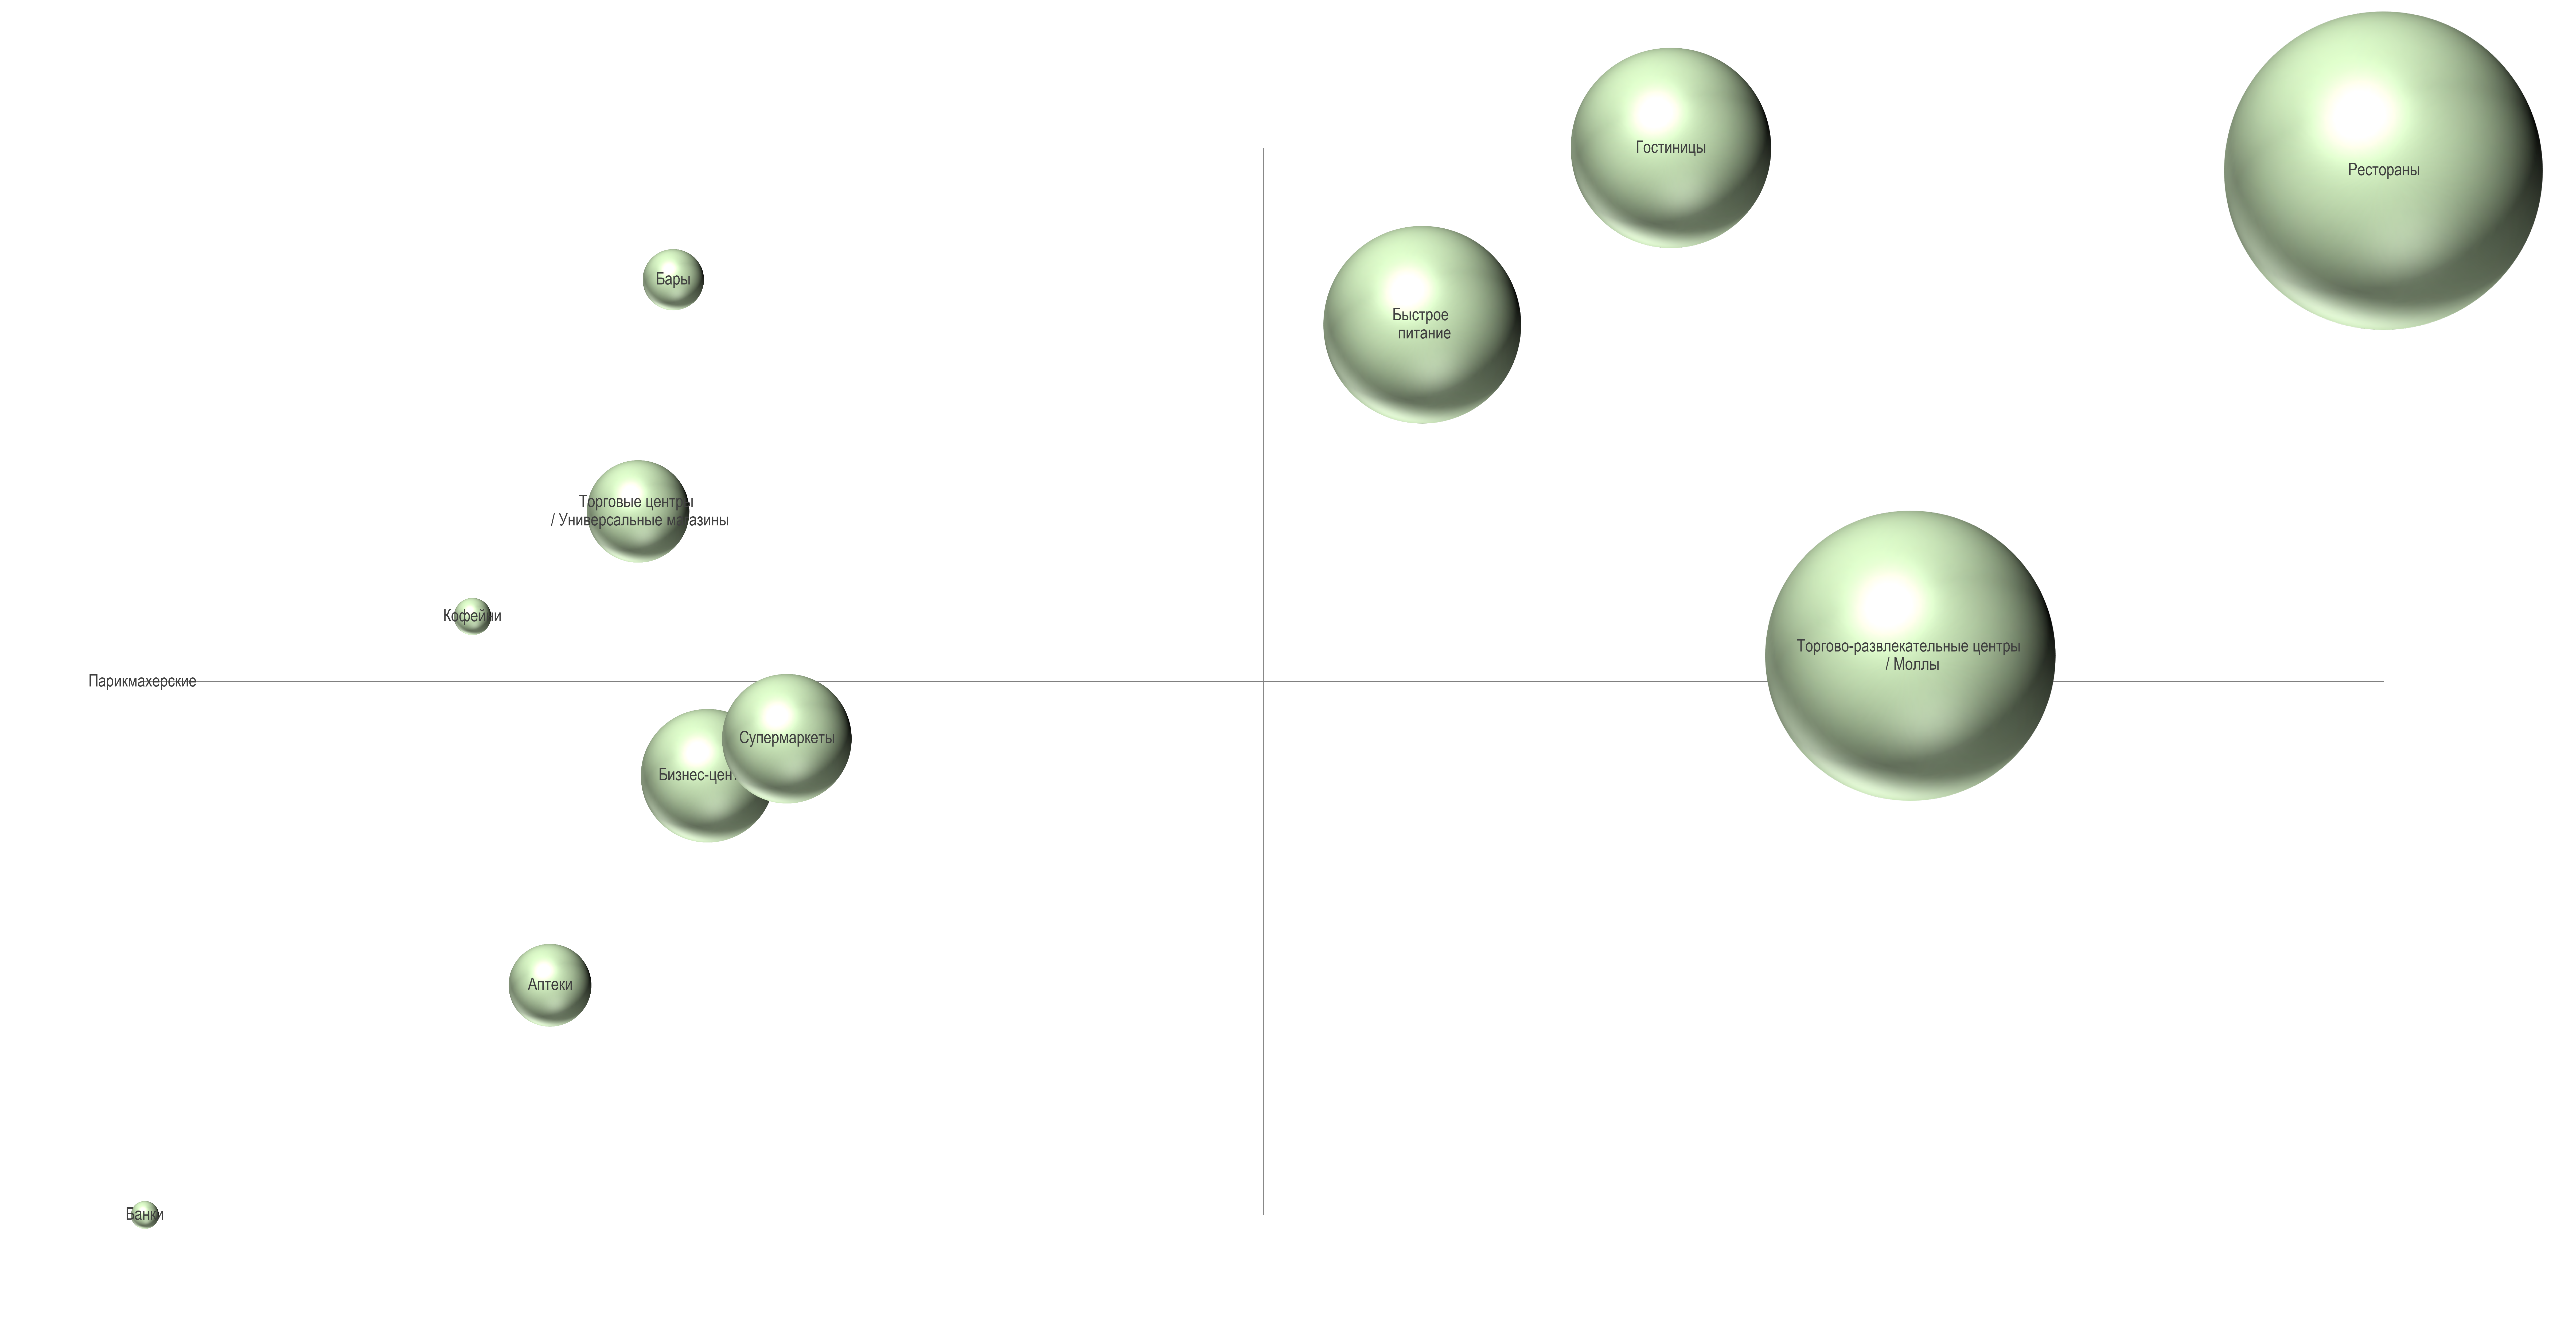

In [248]:
matrix_pics = plot_matrix(file, city, cnt_graphics=1, cnt_shars=12, step=1, size_x=size_x, size_y=size_y, font_size=font_size)

In [259]:
prs = pptx.Presentation('pics/test_new.pptx')
slides = prs.slides
x, y = 30.7, 16
#slides[14].shapes.add_picture(matrix_pics[0], Cm(0.7), Cm(2.4), Cm(x), Cm(y))

In [ ]:
matrix_pics_12 = plot_matrix(file, city, cnt_graphics=12, cnt_shars=12, step=1, size_x=size_x/4, size_y=size_y/3, font_size=font_size/3, size_coef=3)

In [260]:
x = 7.7
y = 5.3
slides[15].shapes.add_picture(matrix_pics_12[0], Cm(0.7),     Cm(2.4), Cm(x), Cm(y))
slides[15].shapes.add_picture(matrix_pics_12[1], Cm(0.7+x),   Cm(2.4), Cm(x), Cm(y))
slides[15].shapes.add_picture(matrix_pics_12[2], Cm(0.7+x*2), Cm(2.4), Cm(x), Cm(y))
slides[15].shapes.add_picture(matrix_pics_12[3], Cm(0.7+x*3), Cm(2.4), Cm(x), Cm(y))

slides[15].shapes.add_picture(matrix_pics_12[4], Cm(0.7),     Cm(2.4+y), Cm(x), Cm(y))
slides[15].shapes.add_picture(matrix_pics_12[5], Cm(0.7+x),   Cm(2.4+y), Cm(x), Cm(y))
slides[15].shapes.add_picture(matrix_pics_12[6], Cm(0.7+x*2), Cm(2.4+y), Cm(x), Cm(y))
slides[15].shapes.add_picture(matrix_pics_12[7], Cm(0.7+x*3), Cm(2.4+y), Cm(x), Cm(y))

slides[15].shapes.add_picture(matrix_pics_12[8],  Cm(0.7),     Cm(2.4+y*2), Cm(x), Cm(y))
slides[15].shapes.add_picture(matrix_pics_12[9],  Cm(0.7+x),   Cm(2.4+y*2), Cm(x), Cm(y))
slides[15].shapes.add_picture(matrix_pics_12[10], Cm(0.7+x*2), Cm(2.4+y*2), Cm(x), Cm(y))
slides[15].shapes.add_picture(matrix_pics_12[11], Cm(0.7+x*3), Cm(2.4+y*2), Cm(x), Cm(y))

In [261]:
save_pptx()

2023-05-30 01:39:24 test_new.pptx


### 1.10.	Анализ Матриц BCG по городам

In [284]:
def plot_matrix_cities(cnt_graphics=100, show=False, size_x=size_x, size_y=size_y, font_size=font_size, size_coef=1):
    folder='ten_city'
    shar_nums = list(range(1,16))*500
    time = str(datetime.datetime.now())[2:16].replace('-','').replace(' ','_').replace(':','')
    df_src = pd.read_parquet(f'files/ten_city/requests_for_shars')
    df_new = df_src[['rubricName','city']].drop_duplicates().set_index(['rubricName','city'])
    df_new['Запросы 2020'] = df_src[df_src['year_r'] == 2020].groupby(['rubricName', 'city']).sum('cnt_requests')[['cnt_requests']]
    df_new['Запросы 2021'] = df_src[df_src['year_r'] == 2021].groupby(['rubricName', 'city']).sum('cnt_requests')[['cnt_requests']]
    df_new['Запросы 2022'] = df_src[df_src['year_r'] == 2022].groupby(['rubricName', 'city']).sum('cnt_requests')[['cnt_requests']]
    df_new['Запросы 2023'] = df_src[df_src['year_r'] == 2023].groupby(['rubricName', 'city']).sum('cnt_requests')[['cnt_requests']]
    df_new = df_new.fillna(0).astype(int)
    df_new['Запросы, итого'] =  df_new['Запросы 2020'] + df_new['Запросы 2021'] + df_new['Запросы 2022'] + df_new['Запросы 2023']
    df_new = df_new.reset_index().set_index('city')

    rubrics = dd.read_parquet(f"files/ten_city/df_tx_grouped_filtered_ten_city")['rubricName'].unique().compute()
    rubrics = [i for i in rubrics.to_dict().values()]
    df_list = []
    pics = []
    for rubric in tqdm(rubrics[:cnt_graphics]):
        shar_num = shar_nums.pop()
        df = df_new.loc[df_new['rubricName']==rubric]
        df['Запросы, итого'] = (df['Запросы, итого'] - min(df['Запросы, итого'])) / (max(df['Запросы, итого']) - min(df['Запросы, итого']))*300
        requests_total = df_new['Запросы 2023'].sum()
        df['Рост/Падение, %'] = df['Запросы 2023'] / df['Запросы 2022']
        df['Доля рынка, %'] = df['Запросы 2023'] / requests_total
        x = (df['Доля рынка, %'])
        y = (df['Рост/Падение, %'])
        sizes = (df['Запросы, итого']/1000)
        x_avg = (x.min()+x.max())/2
        y_avg = (y.min()+y.max())/2
        xi, yi = df['Доля рынка, %'], df['Рост/Падение, %']
        df.loc[(xi > x_avg) & (yi > y_avg), 'group'] = 'Звёзды:'
        df.loc[(xi > x_avg)  & (yi <= y_avg), 'group'] = 'Коровы:'
        df.loc[(xi <= x_avg)  & (yi > y_avg), 'group'] = 'Дети:'
        df.loc[(xi <= x_avg)  & (yi <= y_avg), 'group'] = 'Собаки:'
        df = df.sort_values(['Доля рынка, %', 'Рост/Падение, %'], ascending=[False, False])

        plt.rcParams['figure.figsize'] = size_x, size_y
        plt.rcParams['figure.dpi'] = 2**8
        plt.rcParams['font.size'] = font_size
        fpath = Path(mpl.get_data_path(), r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\arialnarrow.ttf")
        fig, ax = plt.subplots()
        ax.scatter(x, y, sizes, c='#C0504D', alpha=0.7)

        n = 0.02
        m = 0.02
        ax.set_ylim(ax.get_ylim()[0] * (1 - n), ax.get_ylim()[1] * (1 + n))
        ax.set_xlim(ax.get_xlim()[0] * (1 - m), ax.get_xlim()[1] * (1 + m))
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xticklabels('')
        ax.set_yticklabels('')
        plt.tick_params(bottom = False, left=False)
        plt.title(rubric, font=fpath, fontsize=40/size_coef, fontweight=1000)

        for xi, yi, city, size in zip(x, y, x.index, sizes):
            rs = city.split(' ')
            if len(rs) > 1:
                rsl = len(rs) // 2
                city = ' '.join(rs[:rsl] + ['\n'] + rs[rsl:])

            shar_path = [r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\Шар_{:02}.png".format(shar_num)]
            shar_img = OffsetImage(plt.imread(shar_path[0], format="png"), zoom=size/size_coef)
            ab = AnnotationBbox(shar_img, (xi, yi), frameon=False)
            ax.add_artist(ab)
            plt.annotate(city, (xi, yi), ha='center', va='center', font=fpath, color='#404040')

        ax.hlines((y.min()+y.max())/2, x.min(), x.max(), colors='gray', linewidth=1)
        ax.vlines((x.min()+x.max())/2, y.min(), y.max(), colors='gray', linewidth=1)
        
        fig.savefig(f'pictures/{folder}_shar_{shar_num}.png', bbox_inches='tight', transparent=False)
        pics.append(f'pictures/{folder}_shar_{shar_num}.png')
        #plt.show()
        plt.close()
    return pics

In [276]:
matrix_cities_pics = plot_matrix_cities(cnt_graphics=50, size_x=size_x, size_y=size_y, font_size=font_size)

[########################################] | 100% Completed | 2.20 sms
[########################################] | 100% Completed | 2.31 s


  0%|          | 0/50 [00:00<?, ?it/s]

In [278]:
prs = pptx.Presentation('pics/test_new.pptx')
slides = prs.slides
x, y = 30.7, 16
slides[16].shapes.add_picture('pictures/ten_city_shar_2 — копия.png', Cm(0.7), Cm(2.4), Cm(x), Cm(y))

In [279]:
save_pptx()

2023-05-30 02:00:14 test_new.pptx


In [285]:
matrix_cities_pics_12 = plot_matrix_cities(cnt_graphics=12, size_x=size_x/4, size_y=size_y/3, font_size=font_size/3, size_coef=3)

[########################################] | 100% Completed | 2.21 sms
[########################################] | 100% Completed | 2.32 s


  0%|          | 0/12 [00:00<?, ?it/s]

In [289]:
prs = pptx.Presentation('pics/test_new.pptx')
slides = prs.slides
x = 7.7
y = 5.3
slides[17].shapes.add_picture(matrix_pics_12[0], Cm(0.7),     Cm(2.4), Cm(x), Cm(y))
slides[17].shapes.add_picture(matrix_pics_12[1], Cm(0.7+x),   Cm(2.4), Cm(x), Cm(y))
slides[17].shapes.add_picture(matrix_pics_12[2], Cm(0.7+x*2), Cm(2.4), Cm(x), Cm(y))
slides[17].shapes.add_picture(matrix_pics_12[3], Cm(0.7+x*3), Cm(2.4), Cm(x), Cm(y))

slides[17].shapes.add_picture(matrix_pics_12[4], Cm(0.7),     Cm(2.4+y), Cm(x), Cm(y))
slides[17].shapes.add_picture(matrix_pics_12[5], Cm(0.7+x),   Cm(2.4+y), Cm(x), Cm(y))
slides[17].shapes.add_picture(matrix_pics_12[6], Cm(0.7+x*2), Cm(2.4+y), Cm(x), Cm(y))
slides[17].shapes.add_picture(matrix_pics_12[7], Cm(0.7+x*3), Cm(2.4+y), Cm(x), Cm(y))

slides[17].shapes.add_picture(matrix_pics_12[8],  Cm(0.7),     Cm(2.4+y*2), Cm(x), Cm(y))
slides[17].shapes.add_picture(matrix_pics_12[9],  Cm(0.7+x),   Cm(2.4+y*2), Cm(x), Cm(y))
slides[17].shapes.add_picture(matrix_pics_12[10], Cm(0.7+x*2), Cm(2.4+y*2), Cm(x), Cm(y))
slides[17].shapes.add_picture(matrix_pics_12[11], Cm(0.7+x*3), Cm(2.4+y*2), Cm(x), Cm(y))

In [290]:
save_pptx()

2023-05-30 02:07:50 test_new.pptx


### 1.11.	Анализ Матриц BCG по городам и бизнесам

In [296]:
def plot_matrix_rubric_cities(cnt_graphics=100, show=False, size_x=size_x, size_y=size_y, font_size=font_size, size_coef=1):
    folder='ten_city'
    shar_nums = list(range(1,16))*500
    time = str(datetime.datetime.now())[2:16].replace('-','').replace(' ','_').replace(':','')
    df_src = pd.read_parquet(f'files/ten_city/requests_for_shars')
    df_new = df_src[['rubricName','city']].drop_duplicates().set_index(['rubricName','city'])
    df_new['Запросы 2020'] = df_src[df_src['year_r'] == 2020].groupby(['rubricName', 'city']).sum('cnt_requests')[['cnt_requests']]
    df_new['Запросы 2021'] = df_src[df_src['year_r'] == 2021].groupby(['rubricName', 'city']).sum('cnt_requests')[['cnt_requests']]
    df_new['Запросы 2022'] = df_src[df_src['year_r'] == 2022].groupby(['rubricName', 'city']).sum('cnt_requests')[['cnt_requests']]
    df_new['Запросы 2023'] = df_src[df_src['year_r'] == 2023].groupby(['rubricName', 'city']).sum('cnt_requests')[['cnt_requests']]
    df_new = df_new.fillna(0).astype(int)
    df_new['Запросы, итого'] =  df_new['Запросы 2020'] + df_new['Запросы 2021'] + df_new['Запросы 2022'] + df_new['Запросы 2023']
    df_new = df_new.reset_index()
    df_new['city_rubric'] = df_new['city'] + '.' + df_new['rubricName']
    df_new = df_new.set_index('city_rubric').sort_values('Запросы, итого', ascending=False)
    cnt_shars = 12
    step = 1
    rubrics = dd.read_parquet(f"files/ten_city/df_tx_grouped_filtered_ten_city")['rubricName'].unique().compute()
    rubrics = [i for i in rubrics.to_dict().values()]
    df_list = []
    start_range = 1
    stop_range = cnt_shars*step+1
    pics=[]
    for graphic_num in tqdm(range(cnt_graphics)):
        shar_num = shar_nums.pop()
        
        df = df_new.iloc[range(start_range, stop_range, step)]
        start_range = stop_range
        stop_range = (graphic_num+2)*cnt_shars*step+1
        
        df['Запросы, итого'] = (df['Запросы, итого'] - min(df['Запросы, итого'])) / (max(df['Запросы, итого']) - min(df['Запросы, итого']))*300
        requests_total = df_new['Запросы 2023'].sum()
        df['Рост/Падение, %'] = df['Запросы 2023'] / df['Запросы 2022']
        df['Доля рынка, %'] = df['Запросы 2023'] / requests_total
        x = (df['Доля рынка, %'])
        y = (df['Рост/Падение, %'])
        sizes = (df['Запросы, итого']/1000)
        x_avg = (x.min()+x.max())/2
        y_avg = (y.min()+y.max())/2
        xi, yi = df['Доля рынка, %'], df['Рост/Падение, %']
        df.loc[(xi > x_avg) & (yi > y_avg), 'group'] = 'Звёзды:'
        df.loc[(xi > x_avg)  & (yi <= y_avg), 'group'] = 'Коровы:'
        df.loc[(xi <= x_avg)  & (yi > y_avg), 'group'] = 'Дети:'
        df.loc[(xi <= x_avg)  & (yi <= y_avg), 'group'] = 'Собаки:'
        df = df.sort_values(['Доля рынка, %', 'Рост/Падение, %'], ascending=[False, False])

        plt.rcParams['figure.figsize'] = size_x, size_y
        plt.rcParams['figure.dpi'] = 2**8
        plt.rcParams['font.size'] = font_size
        fpath = Path(mpl.get_data_path(), r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\arialnarrow.ttf")
        fig, ax = plt.subplots()
        ax.scatter(x, y, sizes, c='#C0504D', alpha=0.7)

        n = 0.02
        m = 0.02
        ax.set_ylim(ax.get_ylim()[0] * (1 - n), ax.get_ylim()[1] * (1 + n))
        ax.set_xlim(ax.get_xlim()[0] * (1 - m), ax.get_xlim()[1] * (1 + m))
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xticklabels('')
        ax.set_yticklabels('')
        plt.tick_params(bottom = False, left=False)
        #plt.title(rubric, font=fpath, fontsize=40, fontweight=1000)

        for xi, yi, city, size in zip(x, y, x.index, sizes):
            rs = city.split(' ')
            if len(rs) > 1:
                rsl = len(rs) // 2
                city = ' '.join(rs[:rsl] + ['\n'] + rs[rsl:])

            shar_path = [r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\Шар_{:02}.png".format(shar_num)]
            shar_img = OffsetImage(plt.imread(shar_path[0], format="png"), zoom=size/size_coef)
            ab = AnnotationBbox(shar_img, (xi, yi), frameon=False)
            ax.add_artist(ab)
            plt.annotate(city, (xi, yi), ha='center', va='center', font=fpath, color='#404040')

        ax.hlines((y.min()+y.max())/2, x.min(), x.max(), colors='gray', linewidth=1)
        ax.vlines((x.min()+x.max())/2, y.min(), y.max(), colors='gray', linewidth=1)
        
        fig.savefig(f'pictures/{folder}_shar_{shar_num}.png', bbox_inches='tight', transparent=False)
        pics.append(f'pictures/{folder}_shar_{shar_num}.png')
        plt.show()
        plt.close()
    return pics

In [297]:
cnt_matrix_rubric_cities = plot_matrix_rubric_cities(cnt_graphics=1, size_x=size_x, size_y=size_y, font_size=font_size)

[########################################] | 100% Completed | 2.23 sms
[########################################] | 100% Completed | 2.25 s


  0%|          | 0/1 [00:00<?, ?it/s]

In [299]:
cnt_matrix_rubric_cities

['pictures/ten_city_shar_15.png']

In [308]:
prs = pptx.Presentation('pics/test_new.pptx')
slides = prs.slides
x, y = 30.7, 16
slides[18].shapes.add_picture('pictures/ten_city_shar_15.png', Cm(0.7), Cm(2.4), Cm(x), Cm(y))

In [309]:
save_pptx()

2023-05-30 02:29:46 test_new.pptx


In [312]:
matrix_cities_pics_12 = plot_matrix_cities(cnt_graphics=50, size_x=size_x/4, size_y=size_y/3, font_size=font_size/3, size_coef=3)

[########################################] | 100% Completed | 2.21 sms
[########################################] | 100% Completed | 2.22 s


  0%|          | 0/50 [00:00<?, ?it/s]

In [314]:
prs = pptx.Presentation('pics/test_new.pptx')
slides = prs.slides
x = 7.7
y = 5.3
slides[19].shapes.add_picture(matrix_cities_pics_12[0], Cm(0.7),     Cm(2.4), Cm(x), Cm(y))
slides[19].shapes.add_picture(matrix_cities_pics_12[1], Cm(0.7+x),   Cm(2.4), Cm(x), Cm(y))
slides[19].shapes.add_picture(matrix_cities_pics_12[2], Cm(0.7+x*2), Cm(2.4), Cm(x), Cm(y))
slides[19].shapes.add_picture(matrix_cities_pics_12[3], Cm(0.7+x*3), Cm(2.4), Cm(x), Cm(y))

slides[19].shapes.add_picture(matrix_cities_pics_12[4], Cm(0.7),     Cm(2.4+y), Cm(x), Cm(y))
slides[19].shapes.add_picture(matrix_cities_pics_12[5], Cm(0.7+x),   Cm(2.4+y), Cm(x), Cm(y))
slides[19].shapes.add_picture(matrix_cities_pics_12[6], Cm(0.7+x*2), Cm(2.4+y), Cm(x), Cm(y))
slides[19].shapes.add_picture(matrix_cities_pics_12[7], Cm(0.7+x*3), Cm(2.4+y), Cm(x), Cm(y))

slides[19].shapes.add_picture(matrix_cities_pics_12[8],  Cm(0.7),     Cm(2.4+y*2), Cm(x), Cm(y))
slides[19].shapes.add_picture(matrix_cities_pics_12[9],  Cm(0.7+x),   Cm(2.4+y*2), Cm(x), Cm(y))
slides[19].shapes.add_picture(matrix_cities_pics_12[10], Cm(0.7+x*2), Cm(2.4+y*2), Cm(x), Cm(y))
slides[19].shapes.add_picture(matrix_cities_pics_12[11], Cm(0.7+x*3), Cm(2.4+y*2), Cm(x), Cm(y))

In [315]:
save_pptx()

2023-05-30 02:32:54 test_new.pptx
